# Tutorial for galaxyEmulator

galaxyEmulator is a python wrapper for simulating galaxies from [IllustrisTNG](https://www.tng-project.org/) using [SKIRT](https://skirt.ugent.be/root/_home.html) radiative transfer project.

## Imports

In [1]:
import sys
sys.path.append('..')

In [2]:
from galaxyEmulator.config import Configuration
from galaxyEmulator.preprocess import PreProcess
from galaxyEmulator.postprocess import PostProcess

## Create configurations

In [3]:
# Initialize configuration
config = Configuration()

In [4]:
# Get base configuration
conf = config.get_config()

Conflicts in config are indicated in RED.
No conflicts in config


In [5]:
# Include surveys
config.add_survey('CSST')

In [6]:
# reload configuration
conf = config.get_config()

Conflicts in config are indicated in RED.
No conflicts in config


In [7]:
conf

{'dataDir': '../Data',
 'filePath': '../../TNG-100',
 'workingDir': 'run',
 'simulationMode': 'ExtinctionOnly',
 'includeDust': False,
 'dustEmissionType': 'Equilibrium',
 'dustModel': 'ZubkoDustMix',
 'minWavelength': '0.1',
 'maxWavelength': '1.2',
 'boxLengthScale': '20',
 'maxBoxLength': '300',
 'wavelengthGrid': 'Linear',
 'numWavelengths': '300',
 'minLevel': '6',
 'maxLevel': '10',
 'numPackets': '1e7',
 'SEDFamily': 'BC03',
 'initialMassFunction': 'Chabrier',
 'minStellarMass': '1',
 'maxStellarMass': 'inf',
 'numViews': '3',
 'randomViews': True,
 'inclinations': '0,90,180',
 'azimuths': '0,90,180',
 'FoVboxLengthRatio': '1',
 'postProcessing': True,
 'saveDataCube': True,
 'spatialResol': '100',
 'displaySED': True,
 'displaySEDxlogscale': True,
 'snapNum': '94',
 'fixedRedshift': '0.06',
 'numThreads': '12',
 'recordComponents': False,
 'ageThreshold': '10',
 'logCompactnessMean': '5',
 'logCompactnessStd': '0.4',
 'logPressure': '5',
 'PDRClearingTimescale': '3',
 'temperat

## Preprocessing

In [8]:
# Initialize PreProcess
preprocess = PreProcess(conf)

In [9]:
# Get subhalos following conditions indicated in conf
preprocess.get_subhalos()

6041 subhalos in snapshot 94 in stellar mass from 1.0 to inf [10^10 M_sun]


In [10]:
# Get subhaloIDs
preprocess.get_subhaloIDs()

array([     0,      1,      2, ..., 644966, 646870, 649674])

In [11]:
# Initialize for subhalo with ID=649674
preprocess.subhalo(subhaloID=649674)

Stellar Mass of Subhalo 649674 is 1.259705901145935 [10^10 M_sun]


In [12]:
# Preparation of files for SKIRT to run
preprocess.prepare()

Retrieving Stellar and Gas particles.
MAPPING III particles: 0
BC03 particles: 13399
Creating .ski file.
------estimate memory usage------
numViews: 3
numSpatialPixels: 481
numWavelengthPixels: 300
Estimated memory usage: 1.666 GB


In [13]:
# Run SKIRT
preprocess.runSKIRT()

Running SKIRT
19/11/2024 02:14:02.036   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
19/11/2024 02:14:02.036   Running on 2488h for xczhou
19/11/2024 02:14:02.037   Constructing a simulation from ski file 'skirt.ski'...
19/11/2024 02:14:02.095   Starting simulation skirt using 12 threads and a single process...
19/11/2024 02:14:02.095   Starting setup...
19/11/2024 02:14:02.096     Panchromatic wavelength regime
19/11/2024 02:14:02.096     With transfer medium
19/11/2024 02:14:02.096     Redshift: 0.06
19/11/2024 02:14:02.096     Luminosity distance: 277.531 Mpc
19/11/2024 02:14:02.096     Model and grid symmetry: 3D
19/11/2024 02:14:02.096     Photon life cycle: no explicit absorption; with forced scattering
19/11/2024 02:14:02.096   BruzualCharlotSEDFamily opened stored table /share/xczhou/SKIRT/resources/SKIRT9_Resources_Core/SED/BruzualCharlotSEDFamily_Chabrier_hr.stab
19/11/2024 02:14:02.097   ParticleSource reads smoothed source particles from text file /sh

## Postprocessing

In [14]:
# Initialize PostProcess
postprocess = PostProcess(preprocess.properties, conf)

Run Postprocessing


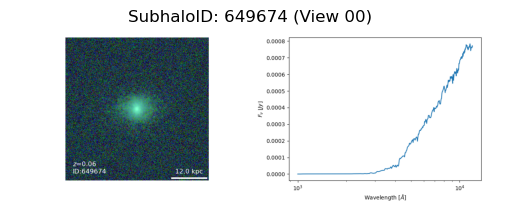

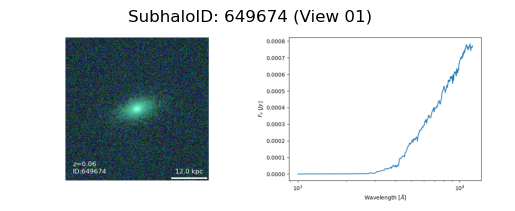

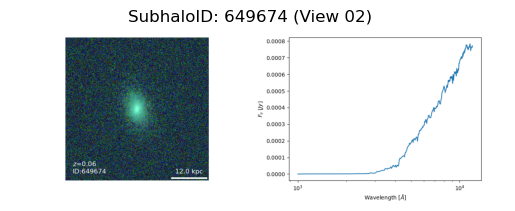

Postprocessing finished! Clearing workingDir!


In [15]:
# Run postprocessing
postprocess.runPostprocess(showImages=True)

## For multiple subhalos

Just simply initialize them by calling `prepare.subhalo(ID)` and call other methods.

In [16]:
for ID in [644966, 646870]:
    preprocess.subhalo(ID) # initialize for subhalo with ID
    preprocess.prepare()
    preprocess.runSKIRT()

    postprocess = PostProcess(preprocess.properties, conf)
    postprocess.runPostprocess()

Stellar Mass of Subhalo 644966 is 1.0225639343261719 [10^10 M_sun]
Retrieving Stellar and Gas particles.
MAPPING III particles: 0
BC03 particles: 10472
Creating .ski file.
------estimate memory usage------
numViews: 3
numSpatialPixels: 460
numWavelengthPixels: 300
Estimated memory usage: 1.524 GB
Running SKIRT
19/11/2024 02:20:34.255   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
19/11/2024 02:20:34.255   Running on 2488h for xczhou
19/11/2024 02:20:34.255   Constructing a simulation from ski file 'skirt.ski'...
19/11/2024 02:20:34.343   Starting simulation skirt using 12 threads and a single process...
19/11/2024 02:20:34.343   Starting setup...
19/11/2024 02:20:34.343     Panchromatic wavelength regime
19/11/2024 02:20:34.343     With transfer medium
19/11/2024 02:20:34.343     Redshift: 0.06
19/11/2024 02:20:34.343     Luminosity distance: 277.531 Mpc
19/11/2024 02:20:34.343     Model and grid symmetry: 3D
19/11/2024 02:20:34.343     Photon life cycle: no expl